# HW0 - Hello Vision World

In this HW you'll get acquainted with OpenCV in a Python-Jupyter environment.

If you're able to read this you were probably successfull at creating a Python-Jupyter environment.

To solve this exercise you will use Numpy, OpenCV, Scipy, Matplotlib, and Skimage.
This is a formidable stack of python tools. Master them and you will be unstoppable!

Consult the docs: 
- http://docs.opencv.org
- https://numpy.org/doc/stable/
- https://scikit-image.org/docs/stable/api/skimage.html
- https://docs.scipy.org/doc//scipy/index.html
- https://matplotlib.org/stable/index.html

Next we will import OpenCV, which is called `cv2` (that's the name of the OpenCV module) in python.

In [2]:
import cv2
import numpy as np
import scipy.linalg

If that executed without an error - you were also able to install OpenCV.

If that didn't run, try running `pip install opencv-python` or `apt-get install python-opencv` on ubuntu.

Next we will load a test image from `scikit-image` (`skimage`). This package can also be installed my means of `pip install scikit-image`.

In [3]:
import skimage.data

In [4]:
image = skimage.data.astronaut()

An image is an array of pixels. It has HxWxC shape: (we can interrogate an image for its shape using `.shape`)

In [5]:
image.shape

(512, 512, 3)

This image has Height and Width of 512, and 3 channels: Red, Green, Blue

The channels are the last dimension, meaning the image is stored in memory where every pixel has 3 components, like so: RGB, RGB, RGB, RGB, ...

Let's plot the image using `matplotlib`'s `pyplot` (`plt`)

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline

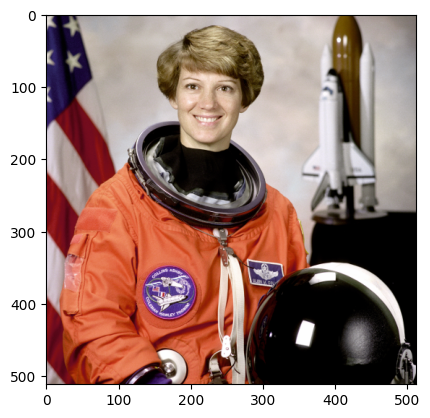

In [7]:
plt.imshow(image)

In [8]:
image[0,0]

array([154, 147, 151], dtype=uint8)

The first pixel in the image has the RGB code: `(154, 147, 151)`, which is kind of a grayish color.

Let's plot out a small patch of the image (10x10 pixels top-left):

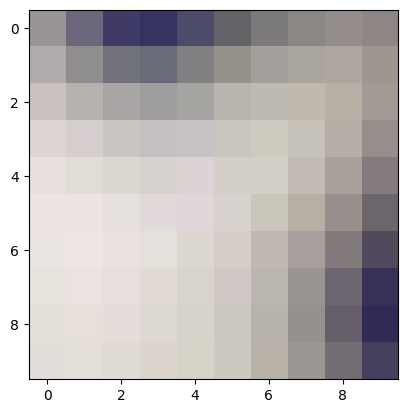

In [9]:
plt.imshow(image[0:10,0:10])

We can do many things with images, such as make them grayscale:

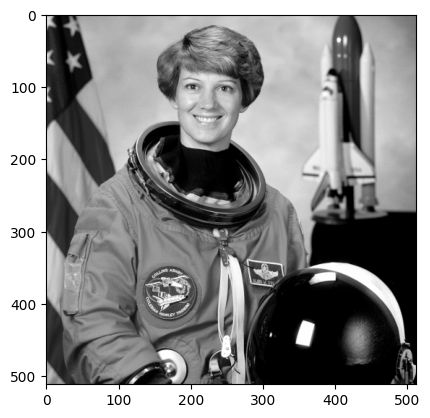

In [10]:
plt.imshow(cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY), cmap='gray')

By default images have values \[0,255\] and their pixels are stored in `uint8` (bytes, unsigned chars)

In [11]:
image.dtype

dtype('uint8')

But we can change that easily, say to 32-bit floating point (e.g. `float32`):

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


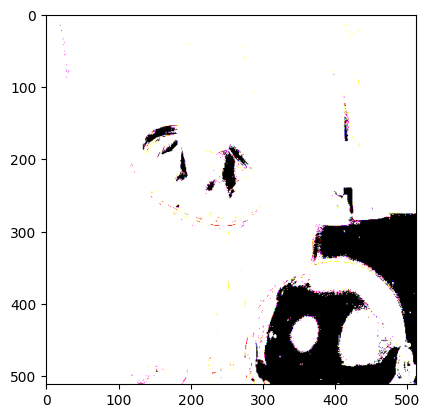

In [12]:
plt.imshow(image.astype(np.float32))

Ah, Matplotlib is complaining that floating point images are usually in range of \[0,1\] and not \[0,255\] like `uint8`s.

So we can easily divide the values element-wise:

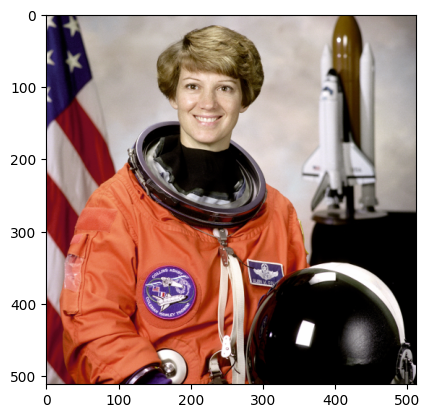

In [13]:
plt.imshow(image.astype(np.float32) / 255.)

Now it looks the same as before.

We can also flip images in different directions:

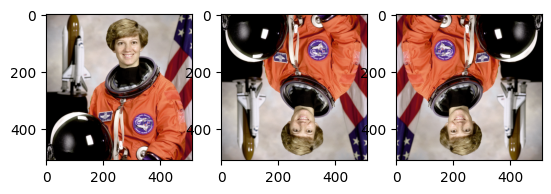

In [14]:
plt.subplot(1,3,1),plt.imshow(cv2.flip(image.copy(), 1))
plt.subplot(1,3,2),plt.imshow(cv2.flip(image.copy(), -1))
plt.subplot(1,3,3),plt.imshow(cv2.flip(image.copy(), 0));

We can blur them:

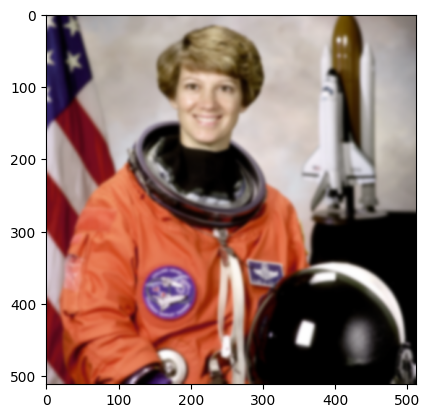

In [15]:
plt.imshow(cv2.GaussianBlur(image.copy(), ksize=(11,11), sigmaX=-1))

---
---

## Here comes your part

In the next sections you will code by yourself. Follow the hints as to what functions to use. Read up about them in the docs.

### Image blur

1) Load the astronaut image to a variable, convert to grayscale and convert to a [0,1] floating point.

2) Blur it with a 11x11 **Box filter** (`cv2.boxFilter`), and a 11x11 **Gaussian filter** (`cv2.GaussianBlur`)

3) Subtract the blurred images from the original

4) Show the results to the notebook (`plt.imshow(...)`) side-by-side (`plt.subplot(1,2,1)`), with a colorbar (`plt.colorbar()`)

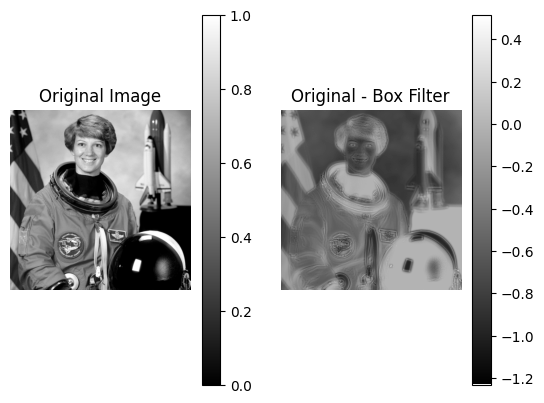

In [37]:
# TODO: your code here
# load the image and cast it to float32 by dividing by 255.
# image =
image = skimage.data.astronaut()
gray_image = cv2.cvtColor(image.copy(), cv2.COLOR_RGB2GRAY)
gray_image = (gray_image.astype(np.float32) / 255.)
#plt.imshow(gray_image, cmap='gray')###1

###blur plt.imshow(cv2.GaussianBlur(image.copy(), ksize=(11,11), sigmaX=-1))
blur_image_box = cv2.boxFilter(gray_image.copy(), ddepth=-1, ksize=(11, 11))
blur_image_gauss = cv2.GaussianBlur(gray_image.copy(), ksize=(11,11), sigmaX=-0)

new_image = gray_image - blur_image_gauss - blur_image_box

# plot the image after applying the box filter and the Gaussian filter
# plt.subplot(...

plt.subplot(1,2,1)
plt.imshow(gray_image, cmap='gray')
plt.title('Original Image')
plt.axis('off')
plt.colorbar()

plt.subplot(1,2,2)
plt.imshow(new_image, cmap='gray')
plt.title('Original - Box Filter')
plt.axis('off')
plt.colorbar()

plt.show()

See how subtracting the blur (low frequencies) from the original has left only the edges (high frequencies).

Try different kernel sizes to see the effect on the edges.

### Colorspaces

1) Load the astronaut image (RGB)

2) Convert to HSV (use `cv2.cvtColor`)

3) Display the H, S and V components, side-by-side (`plt.subplot`, `plt.imshow`), each component (a.k.a "plane") in the image can be accessed by e.g. `image[..., 2]` for the 3rd component.

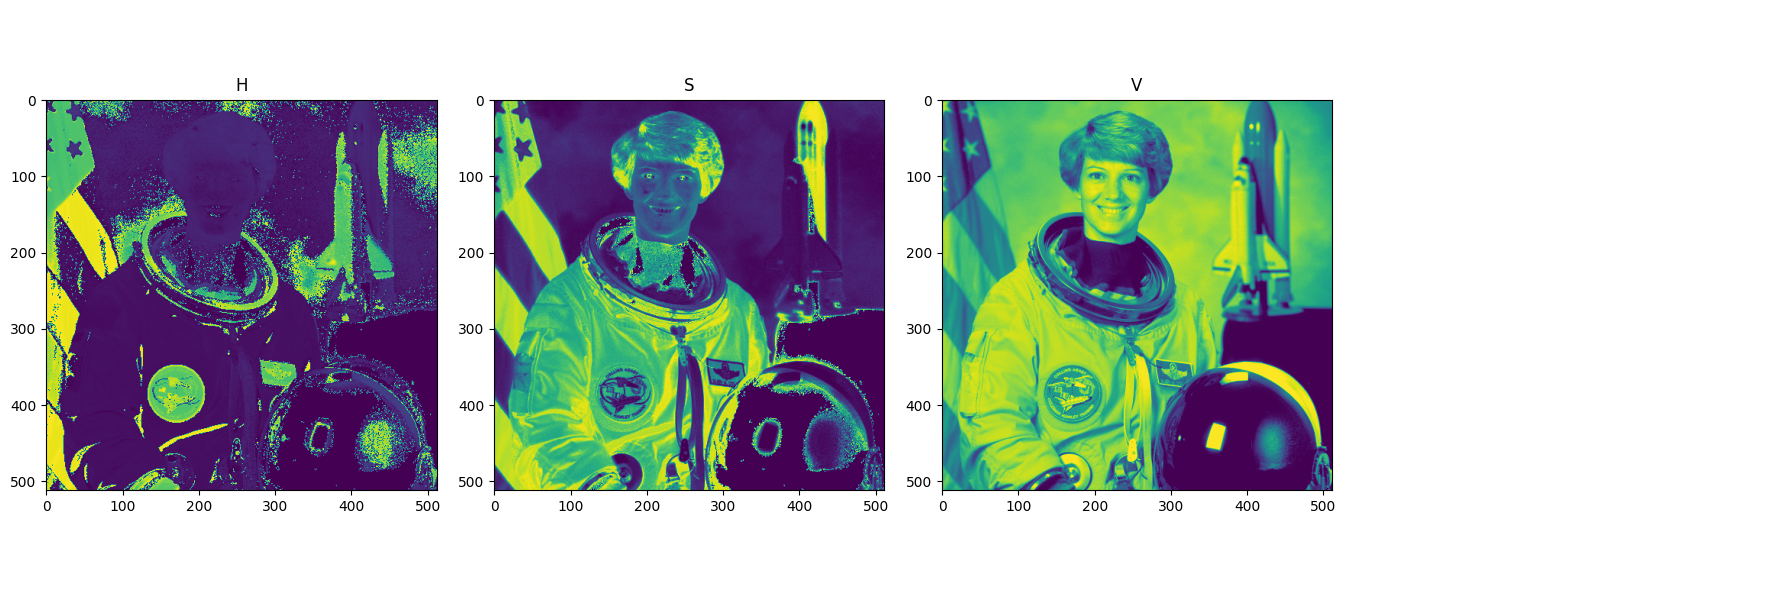

In [23]:
image = np.float32(skimage.data.astronaut()) / 255.
image_hsv = cv2.cvtColor(image, cv2.COLOR_RGB2HSV)
# plt.subplot(1, 3, 1)
fig, axes = plt.subplots(1, 4, figsize=(18, 6))
axes[0].imshow(image_hsv[:, :, 0])
axes[0].set_title('H')
axes[1].imshow(image_hsv[:, :, 1])
axes[1].set_title('S')
axes[2].imshow(image_hsv[:, :, 2])
axes[2].set_title('V')
plt.axis('off')
plt.tight_layout()
plt.show()


# TODO: your code here
# image_hsv = ...
# plt.subplot(...

Change only the brightness of the image (add 0.2 to the `v`, "value", component) and display it again as the original. 
You will need to `cv2.cvtColor` back to RGB using `cv2.COLOR_HSV2RGB`.

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


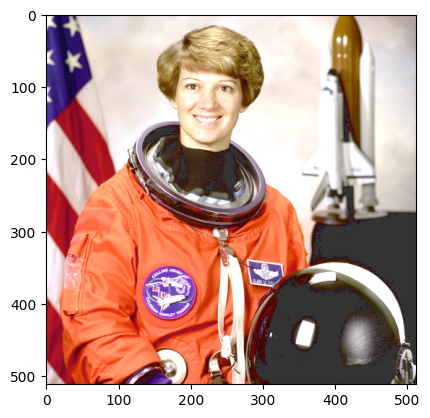

In [24]:
# TODO: your code here
# use the [..., 2] channel to adjust the brightness
# image_hsv...
# image = ...
# plt.imshow(
image_hsv[..., 2] += 0.2
image = cv2.cvtColor(image_hsv, cv2.COLOR_HSV2RGB)
plt.imshow(image)

Plot all the colors in the astronaut image on the `rg` plane

First, normalize the colors, e.g. `r = R / (R + G + B)` and `g = G / (R + G + B)` and `b = B / (R + G + B)`

Use `np.sum` on the last (-1) axis, and add `np.finfo(np.float32).eps` to avoid division by zero

Then use a scatter plot `ax.scatter` to show the points (use `s=1` to make the points smaller)

For each point in the scatter show its color by adding `c=np.dstack([r,g,b]).reshape(-1,3)` to the `.scatter(` call

Thinking point: how much of the visible color gamut does this image cover?

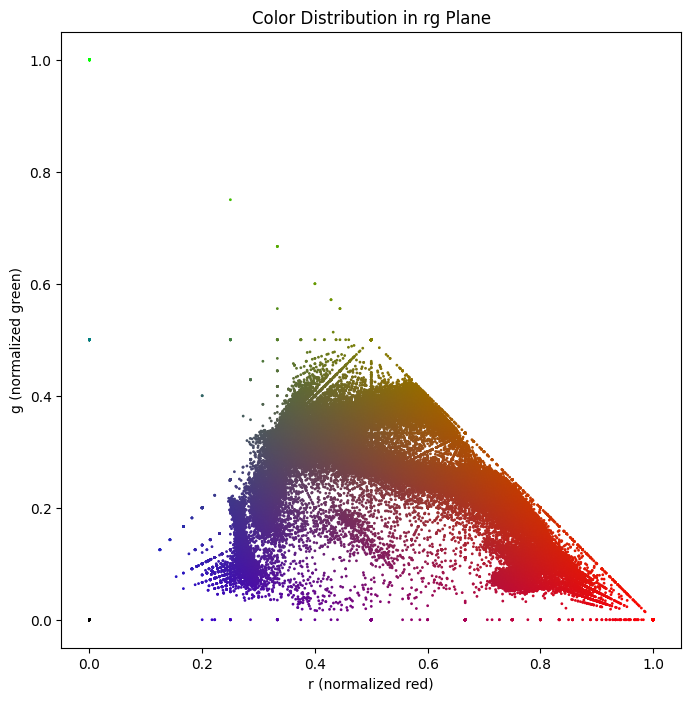

In [19]:
image = np.float32(skimage.data.astronaut()) / 255.

# TODO: your code here
# compute the sum of the three channels
# use np.finfo(np.float32).eps to avoid division by zero
# summ = ... 
summ = np.sum(image, axis=-1, keepdims=True) + np.finfo(np.float32).eps


# normalize the image so that the sum of the three channels is 1
# use the [..., 0] notation to access e.g. the first channel
# r = image[...
r = image[..., 0] / summ[..., 0]
g = image[..., 1] / summ[..., 0]
b = image[..., 2] / summ[..., 0]

# use the scatter function to plot the points
# ax.scatter(
fig, ax = plt.subplots(figsize=(8, 8))

ax.scatter(r.flatten(), g.flatten(), s=1, c=np.dstack([r, g, b]).reshape(-1, 3))
ax.set_xlabel('r (normalized red)')
ax.set_ylabel('g (normalized green)')
ax.set_title('Color Distribution in rg Plane')

plt.show()

---

## Least Squares

Let's practice a little bit of least squares fitting (under some conditions you may know this as "linear regression")

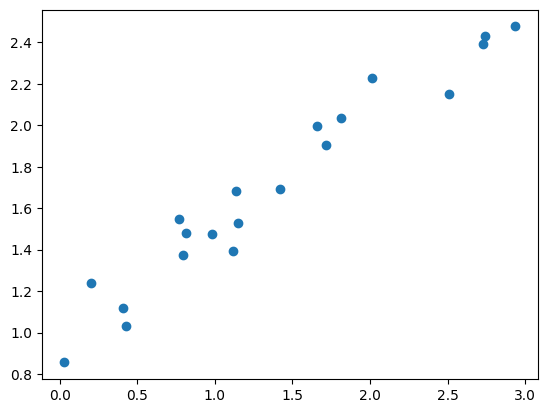

In [20]:
# ramdomize 20 2d points around a line with the given slope and intercept
slope = 0.5
intercept = 1
pts2d = np.random.uniform(0,3,(20,2))
pts2d[:,1] = slope * pts2d[:,0] + intercept
pts2d += np.random.normal(0,0.1,(20,2))
plt.scatter(pts2d[:,0],pts2d[:,1])

Slope: -0.34967478718510064, Intercept: 0.4465202851684686
[-0.34967479  0.44652029]


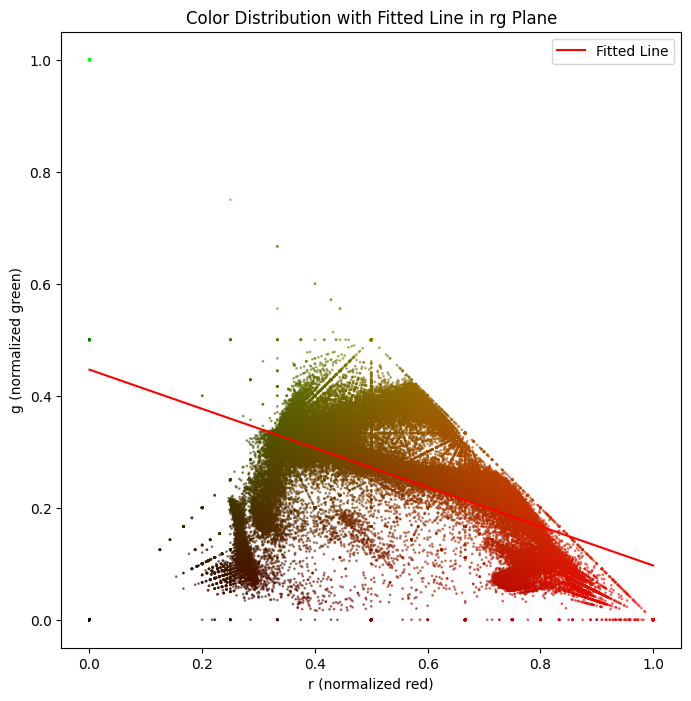

In [25]:
# fit a line to the points using linear least squares from scipy
from scipy.optimize import least_squares


# Load the astronaut image
image = image.astype(np.float32)

# Normalize the RGB channels
summ = np.sum(image, axis=-1, keepdims=True) + np.finfo(np.float32).eps
r = image[..., 0] / summ[..., 0]
g = image[..., 1] / summ[..., 0]

pts2d = np.vstack([r.flatten(), g.flatten()]).T

# TODO: your code here
def objective_fun(x, pts):
    slope, intercept = x[0], x[1]
    return pts[:, 1] - (slope * pts[:, 0] + intercept)
    # write the objective function here to minimize the error between the line and the points
    # x[0] is the slope, x[1] is the intercept
    # pts is the 2d points, pts[:,0] is the x coordinates and pts[:,1] is the y coordinates
    # return the error, which is the difference between the line and the points

    # return ...

# use least_squares to minimize the error objective_fun
# send the initial guess [0,0] and the points pts2d
# res is the result from least_squares
# TODO: your code here
# res = ...
initial_guess = [0, 0]  # Starting with slope=0, intercept=0
res = least_squares(objective_fun, initial_guess, args=(pts2d,))

print(f"Slope: {res.x[0]}, Intercept: {res.x[1]}")

print(res.x)

# plot the line
# res is the result from least_squares
# res.x[0] is the slope, res.x[1] is the intercept
# pts2d is the 2d points, use pts2d[:,0] to get the x coordinates and multiply by the slope and add the intercept
# use plt.scatter to plot the points and plt.plot to plot the line
# plt.show() to show the plot
# TODO: your code here
# plt.plot(...)

# Plot the points and the fitted line
fig, ax = plt.subplots(figsize=(8, 8))

# Scatter plot of the normalized r and g values
ax.scatter(r.flatten(), g.flatten(), s=1, c=np.dstack([r, g, np.zeros_like(r)]).reshape(-1, 3), alpha=0.5)

# Plot the fitted line
x_vals = np.linspace(0, 1, 1000)  # Generate a range of x values for the line
y_vals = res.x[0] * x_vals + res.x[1]  # Compute the corresponding y values using the slope and intercept
ax.plot(x_vals, y_vals, color='red', label='Fitted Line')

# Set axis labels and title
ax.set_xlabel('r (normalized red)')
ax.set_ylabel('g (normalized green)')
ax.set_title('Color Distribution with Fitted Line in rg Plane')
ax.legend()

plt.show()

In the next cell we will use SVD to fit a 3D plane "in the least squares sense". Recall our conversation in class about homogenous systems of linear equations.

The 3D plane has the form `a*x + b*y + c*z + d = 0` where `(a, b, c)` is effectively the normal to the plane and `d` is the distance from the origin.

With the 3D data below we will do a "trick". Subtract the centroid (mean, average) of the values so that they all center around 0, 0, 0. 

This will make finding the best fit plane easier, since now we're only looking for a "direction" - the normal to the plane. We eliminate the plane's last parameter - distance from the origin.

Luckily the SVD can give us just that!

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


[-0.20213842  0.7794594  -0.5929444 ]


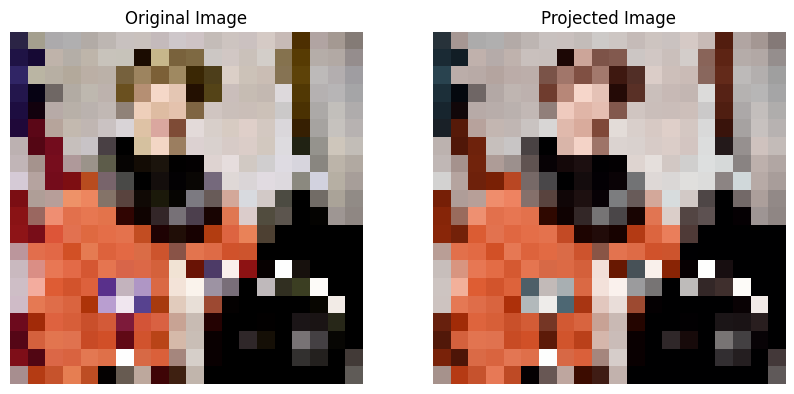

In [31]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import data

# Load the astronaut image and convert to float in [0, 1]
image = skimage.data.astronaut()
image = np.float32(image) / 255.0

# Resize the image to 20x20
image = cv2.resize(image, (20, 20))

# Flatten the image pixels array to a list of 3D points
image_flat = np.reshape(image, (-1, 3))

# Subtract the mean of the pixel colors
mean_color = np.mean(image_flat, axis=0)
image_flat = image_flat - mean_color

# Perform SVD to get the singular vectors
_, _, vT = np.linalg.svd(image_flat)
v = vT[-1]

print(v)

# Project the pixels onto the plane
image_projected = np.zeros(image_flat.shape)
for i in range(image_flat.shape[0]):
    point = image_flat[i]
    projection = point - np.dot(point, v) * v
    image_projected[i] = projection

# Add the mean color back to the projected image
image_projected += mean_color

# Reshape the flattened arrays back to the original image shape
image_flat_reshaped = np.reshape(image_flat, image.shape)
image_projected_reshaped = np.reshape(image_projected, image.shape)

# Plot the original image and the projected image
plt.figure(figsize=(10, 5))

# Original image
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.title('Original Image')
plt.axis('off')

# Projected image
plt.subplot(1, 2, 2)
plt.imshow(image_projected_reshaped)
plt.title('Projected Image')
plt.axis('off')

plt.show()


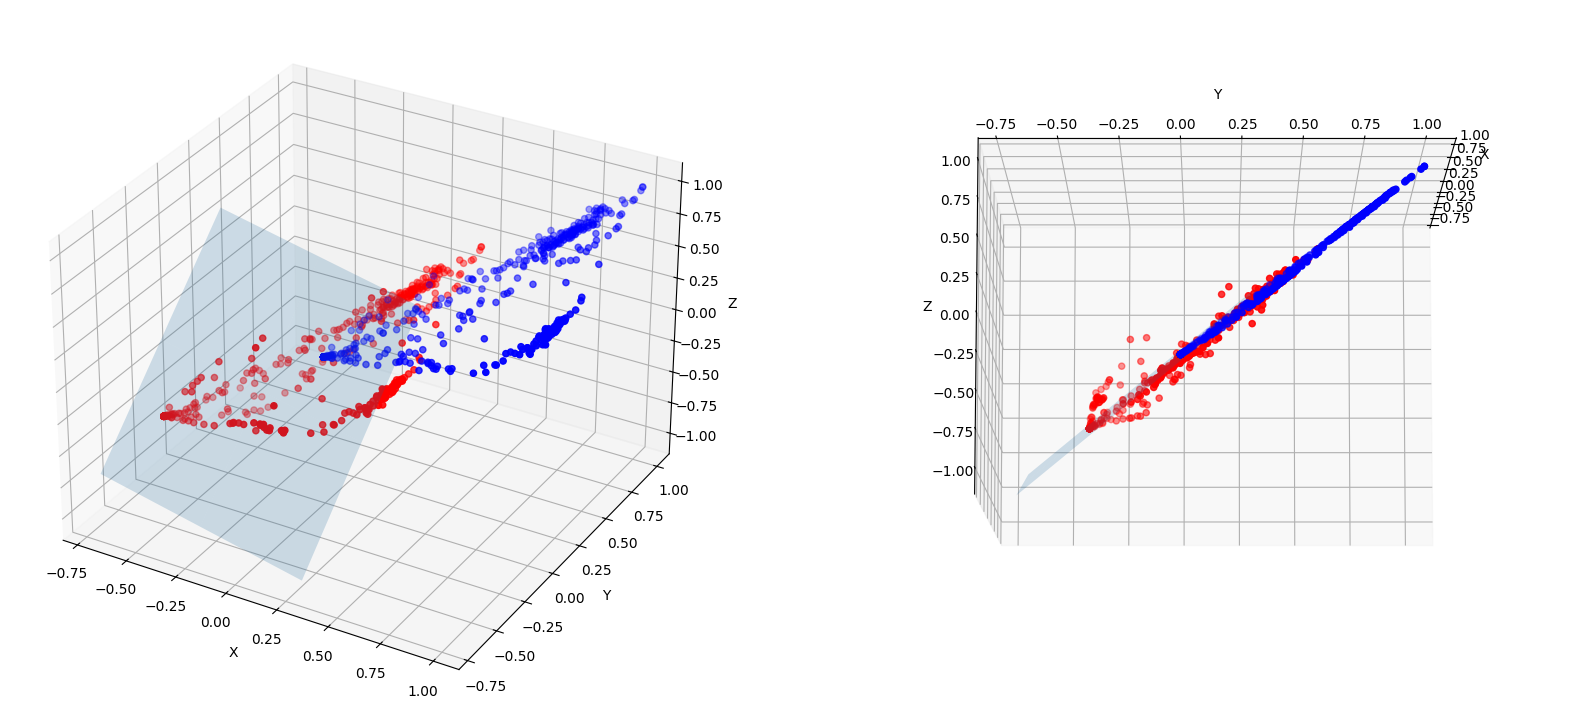

In [32]:
# this code plots the 3D plane and the pixels colors
# it is not part of the exercise but you can use it to check your results
# v is the plane parameters
# image_projected is the projected pixels colors
# image_flat is the original pixels colors

xx, yy = np.meshgrid(np.arange(-0.7,0.7,0.5), np.arange(-0.7,0.7,0.5))
z = (-v[0] * xx - v[1] * yy) / v[2]

fig = plt.figure(figsize=(20,10))
for figid in [1, 2]:
    # scatter the pixels colors
    ax = fig.add_subplot(1,2,figid, projection='3d')
    ax.scatter(image_projected[:,0], image_projected[:,1], image_projected[:,2],c='b')
    ax.scatter(image_flat[:,0], image_flat[:,1], image_flat[:,2], c='r')
    # plot the surface
    ax.plot_surface(xx, yy, z, alpha=0.2)

    plt.xlabel('X')
    plt.ylabel('Y')
    ax.set_zlabel('Z')
    ax.axis('auto')
    if figid == 2:
        ax.view_init(-9, 0, 0)

plt.show()

Well done!

You've completed HW1, you're well on your way to become a computer vision practitioner.